# Cluster Analysis

#### Import libraries

In [1]:
import os
import sys
from pathlib import Path
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
import matplotlib.pylab as plt 
import matplotlib.colors
import matplotlib.cm as cm
import seaborn as sns 
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Set random seed variable for code reproducibility
SEED = 0
# Set the number of threads to avoid kmeans thread warning
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
# Import local libraries
root_dir = Path.cwd().resolve().parents[0]
sys.path.append(str(root_dir))

# Visualization functions
from src.visuals.make_plots import *

# Load the "autoreload" extension so that code can change
%load_ext autoreload
#%reload_ext autoreload

# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

### Example 1: Lecture

**Calculate distance between Homer and Mr. Burns**

Example 1:
Homer: Age = 68, Income = $50,000 and # of Credit Cards = 5
Mr. Burns: Age = 97, Income = 1,000,000 and # of Credit Cards = 0

Example 2:
Homer: Age = 68, Years at Power Plant = 30 and Actual Work Hours = 15
Mr. Burns: Age = 97, Years at Power Plant = 36 and Actual Work Hours = 0

<h4 style="color:blue"> Write Your Code Below: </h4>

In [ ]:
print(f"Example 1: d(Homer, Mr. Burns): {euclidean(np.array([68, 50000, 5]), 
                                                   np.array([97, 1000000, 0])):.0f}")
print(f"Example 2: d(Homer, Mr. Burns): {euclidean(np.array([68, 30, 15]), 
                                                   np.array([97, 36, 0])):.0f}")

<h3 style="color:teal"> Expected Output: </h3>

Example 1: d(Homer, Mr. Burns): 950000
Example 2: d(Homer, Mr. Burns): 33


**Create a dataframe for the Simpsons characters**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [ ]:
data = {
    "Age": [68, 49, 57, 70, 41, 29],
    "Income": [50000.00, 40000.00, 54000.00, 62000.00, 35000.00, 26000.00]
}
index = ["Homer", "Seymour", "Lenny", "Carl", "Edna", "Otto"]
df = pd.DataFrame(data, index=index)
df

<h3 style="color:teal"> Expected Output: </h3>

,Age,Income
Homer,68,50000.0
Seymour,49,40000.0
Lenny,57,54000.0
Carl,70,62000.0
Edna,41,35000.0
Otto,29,26000.0


**Normalize the data using custom min/max values for Age and Income**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [ ]:
df_scaled = df.copy()

min_max = {
    'Age': (0, 98),
    'Income': (0, 1000000.00)
}

for col, (vmin, vmax) in min_max.items():
    df_scaled[col] = (df[col] - vmin) / (vmax - vmin)
df_scaled

<h3 style="color:teal"> Expected Output: </h3>

,Age,Income
Homer,0.693878,0.050
Seymour,0.500000,0.040
Lenny,0.581633,0.054
Carl,0.714286,0.062
Edna,0.418367,0.035
Otto,0.295918,0.026


**Run cluster analysis**

Utilize Seymour and Homer for initial centroids and run cluster analysis for **k=2**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [ ]:
ic1 = df_scaled.loc['Seymour'].values
ic2 = df_scaled.loc['Homer'].values
initial_centroids = np.array([ic1, ic2])

# Setting up KMeans clustering
kmeans = KMeans(___).fit(df_scaled)

df_c = df_scaled.copy()
print("Number of iterations:", kmeans.n_iter_)
# Adding cluster labels to the DataFrame
df_c['Cluster'] = kmeans.labels_
df_c

<h3 style="color:teal"> Expected Output: </h3>

Number of iterations: 3


,Age,Income,Cluster
Homer,0.693878,0.050,1
Seymour,0.500000,0.040,0
Lenny,0.581633,0.054,1
Carl,0.714286,0.062,1
Edna,0.418367,0.035,0
Otto,0.295918,0.026,0


## Textbook Example Problem

### 16.2 Pharmaceutical Industry.

An equities analyst is studying the pharmaceutical industry and would like your help in exploring and
understanding the financial data collected by her firm. Her main objective is to understand the structure of the pharmaceutical industry using some basic financial measures.

Financial data gathered on 21 firms in the pharmaceutical industry are available in the file _Pharmaceuticals.csv_. For each firm, the following variables are recorded:

1. Market capitalization (in billions of dollars)
2. Beta
3. Price/earnings ratio
4. Return on equity
5. Return on assets
6. Asset turnover
7. Leverage
8. Estimated revenue growth
9. Net profit margin
10. Median recommendation (across major brokerages)
11. Location of firm's headquarters
12. Stock exchange on which the firm is listed

Use cluster analysis to explore and analyze the given dataset.

**Read in data from `Pharmaceuticals.csv` file.**

Set the Symbol as the index.

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
Symbol,,,,,,,,,,,,,
ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE


**Drop the Name, Median_Recommendation, Location, and Exchange columns.**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Symbol,,,,,,,,,
ABT,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1
AGN,7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5
AHM,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2
AZN,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0
AVE,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9


**Normalize the data.**

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Symbol,,,,,,,,,
ABT,0.188642,-0.821041,-0.047867,0.041080,0.247579,-5.247542e-16,-0.217336,-0.540801,0.063205
AGN,-0.875518,-0.461835,3.583430,-0.875950,-0.965557,9.453132e-01,0.018736,-0.390551,-1.592035
AHM,-0.897899,-0.262277,-0.299168,-0.740094,-0.522666,9.453132e-01,-0.414062,-0.586247,-0.701953
AZN,0.174479,-0.022807,-0.248907,0.109009,0.940799,9.453132e-01,-0.768169,0.151089,0.359900
AVE,-0.183447,-0.821041,-0.336863,-0.271389,-0.580435,-4.726566e-01,-0.322256,1.246425,-0.436490


**Create Elbow Chart**

Go to the documentation page for kMeans [here](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html) and review the options and default values for:

- init
- n_init
- max_iter

Experiment with different parameters and observe how initial centroid placement impacts the output.

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

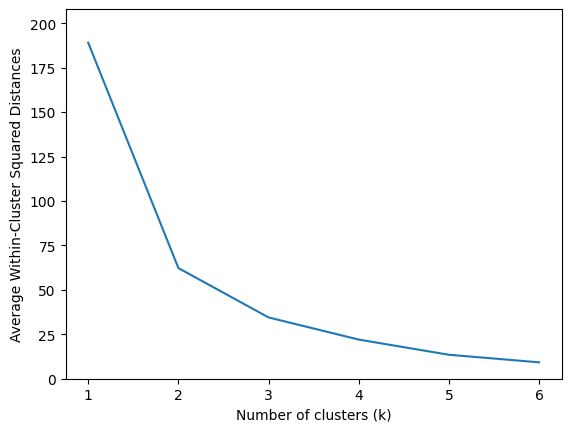

**Plot Silhouette Scores**

Plot silhouette scores for **k range 2 to 7**.

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

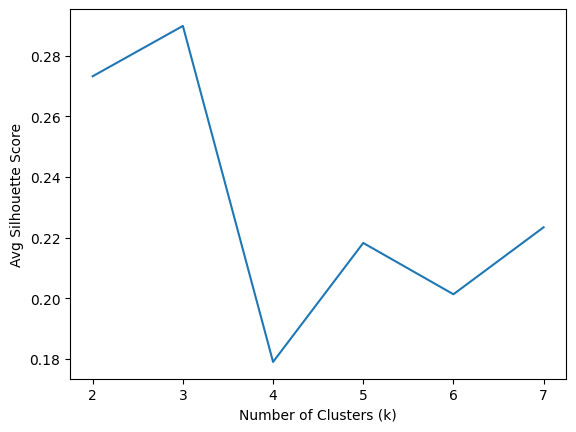

**Create a Profile Plot**

Use **k = 3** based on observations from the elbow chart and silhouette scores.

<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

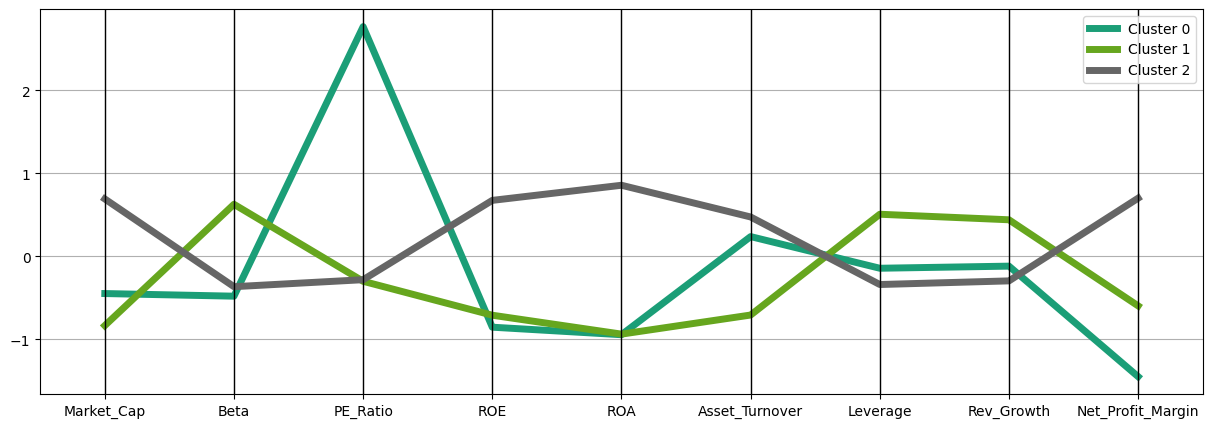

**Use PCA to Visualize Clusters**

Principal Component Analysis (PCA) is a powerful technique that helps visualize high-dimensional data by reducing it to 2D or 3D representations while preserving as much variance as possible. When performing k-Means clustering, PCA can be used to project the clustered data into a lower-dimensional space, making it easier to see patterns and assess the effectiveness of the clustering.

By applying PCA, we can:

- Observe Cluster Separation – Determine if clusters are well-separated or overlapping.
- Validate the Number of Clusters – Identify if the chosen K value aligns with natural groupings in the data.
- Improve Interpretability – Understand how data points relate to each other in reduced dimensions.

While PCA simplifies visualization, it should be used with caution as some information may be lost in dimensionality reduction.


<h4 style="color:blue"> Write Your Code Below: </h4>

<h3 style="color:teal"> Expected Output: </h3>

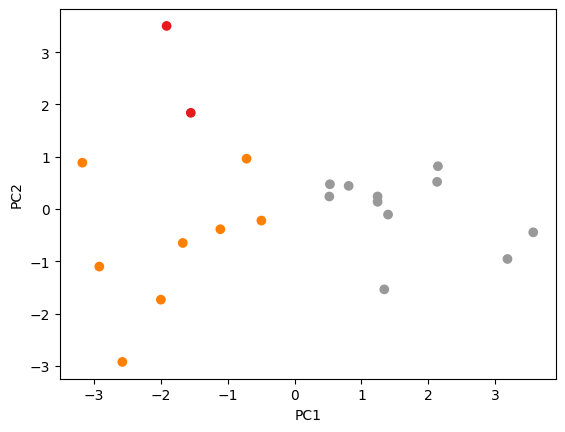